# Lorenz-System

Projekt für Numerische Methoden für Differentialgleichungen

von Clemens, Emil, Johannes und Max

### Einleitung

wer was wann warum

### Numerische Analyse

_Emil_

### Euler-Methode

_Clemens_

### Runge-Kutte 4

_Johannes_

### Prediktor-Korrektor-Verfahren

Die Idee des Prediktor-Korrektor-Verfahrens ist die Kombination von expliziten und impliziten Verfahren um gute Konvergenzeigenschaften zu erhalten, ohne dabei den Rechenleistungspreis der impliziten Verfahren zu zahlen.

Dazu wird als Prediktor ein Schritt eines expliziten Verfahrens ausgeführt und das Ergebnis in den Korrektor, einer impliziten Gleichung, eingesetzt um kein möglicherweise nicht-lineares Gleichungssystem lösen zu müssen.

Oft verwendete Prediktor-Korrektor-Verfahren:
- Heun-Verfahren: explizites Euler-Verfahren als Prediktor und Crank-Nicolson als Korrektor
- ABM: Adams-Bashforth als Prediktor und Adams-Moulton als Korrektor

P(EC)$^k$E erklären

Beispiel

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("animation", html="jshtml")

In [2]:
class LorenzSystem:
    
    def __init__(self, rho, r, b):
        '''initialize the object with the parameters rho, r and b of the system'''
        
        self.rho = rho
        self.r = r
        self.b = b
                
    def ODE(self, state):
        '''differential equation of the object: x'=rho*(x-y), y'=x*(r-z)-y, z'=x*y-b*z'''
        
        x, y, z = state
        return np.array([self.rho*(x-y), x*(self.r-z)-y, x*y-self.b*z])
    
    def solve(self, state0, h=0.01, N=1000, steps=4):
        '''solves the ODE with given initial state and discretized time interval using ABE'''
        
        state0 = np.array(state0)
        steps = steps if 0 < steps < 5 else 4
        
        # initialize state array with initial state
        states = np.zeros((N+1, 3))
        states[0] = state0
        
        # initialize ODE function values
        fvals = np.zeros((N+1, 3))
        fvals[0] = self.ODE(state0)
        
        # coefficients for Adams-Bashforth method
        coeffsAB = (1,
                    [-1/2, 3/2],
                    [5/12, -16/12, 23/12],
                    [-9/24, 37/24, -59/24, 55/24])
        
        # coefficients for Adams-Moulton method
        coeffsAM = ([1/2, 1/2],
                    [-1/12, 2/3, 5/12],
                    [1/24, -5/24, 19/24, 9/24],
                    [-19/720, 106/720, -264/720, 646/720, 251/720])
        
        # increasing steps until desired order is reached
        for s in range(steps):
            # predictor: Adams-Bashforth method
            states[s+1] = states[s] + h * np.dot(coeffsAB[s], fvals[:s+1])
            
            # corrector: Adams-Moulton method
            states[s+1] = states[s] + h * (np.dot(coeffsAM[s][:-1], fvals[:s+1]) + coeffsAM[s][-1] * self.ODE(states[s+1]))
            
            # evaluation
            fvals[s+1] = self.ODE(states[s+1])
        
        # main loop
        for n in range(N-steps+1):
            # predictor: Adams-Bashforth method
            states[n+steps] = states[n+steps-1] + h * np.dot(coeffsAB[steps-1], fvals[n:n+steps])

            # corrector: Adams-Moulton method
            states[n+steps] = states[n+steps-1] + h * (np.dot(coeffsAM[steps-1][:-1], fvals[n:n+steps]) + coeffsAM[steps-1][-1] * self.ODE(states[n+steps]))
            
            # evaluation
            fvals[n+steps] = self.ODE(states[n+steps])
        
        return states
    
    def plot(self, *args, h=0.01, N=1000):
        '''plots the solved system for multiple initial conditions on a 3D axis'''
        
        fig = plt.figure()
        ax = fig.gca(projection="3d")
        
        ax.w_xaxis.pane.set_color("w")
        ax.w_yaxis.pane.set_color("w")
        ax.w_zaxis.pane.set_color("w")
        ax.set_xlabel("x Axis")
        ax.set_ylabel("y Axis")
        ax.set_zlabel("z Axis")
        ax.set_title(fr"Lorenz System for $\rho$ = {self.rho:.0f}, r = {self.r:.0f}, b = {self.b:.2f}", pad=16)
        
        for state in args:
            states = self.solve(state, h=h, N=N)
            ax.plot(*states.T, linewidth=0.5, alpha=0.95, label=f"initial state = {state}")
            
        plt.legend()
        plt.show()
    
    def animate(self, *args, h=0.01, N=1000, save=False):
        '''animates the changing of the system with respect to time'''
        
        states = ()
        for arg in args:
            states += self.solve(arg, h=h, N=N),

        fig = plt.figure()
        ax = fig.gca(projection="3d")
        
        ax.w_xaxis.pane.set_color("w")
        ax.w_yaxis.pane.set_color("w")
        ax.w_zaxis.pane.set_color("w")
        ax.set_xlabel("x Axis")
        ax.set_ylabel("y Axis")
        ax.set_zlabel("z Axis")
        ax.set_xlim3d([-20, 20])
        ax.set_ylim3d([-25, 25])
        ax.set_zlim3d([0, 50])
        ax.set_title(fr"Lorenz System for $\rho$ = {self.rho:.0f}, r = {self.r:.0f}, b = {self.b:.2f}", pad=16)
        
        lines = ()
        points = ()
        for n, state in enumerate(states):
            lines += ax.plot(state[0:1, 0], state[0:1, 1], state[0:1, 2], color=f"C{n}", linewidth=0.5, alpha=0.95)[0],
            points += ax.plot(state[0:1, 0], state[0:1, 1], state[0:1, 2], ".", color=f"C{n}")[0],
        plt.close()
        
        def init():
            for state, line, point in zip(states, lines, points):
                line.set_data([], [])
                line.set_3d_properties([])
                point.set_data([], [])
                point.set_3d_properties([])
            return (*lines, *points)

        def update(i):
            for state, line, point in zip(states, lines, points):
                line.set_data(state.T[:2, :i])
                line.set_3d_properties(state.T[2, :i])
                point.set_data(state[i, :2])
                point.set_3d_properties(state[i, 2])
            return (*lines, *points)
        
        anim = FuncAnimation(fig, update, N, init_func=init, interval=4, blit=True)
        
        if save:
            anim.save("anim.mp4", bitrate=5000)
        else:
            return anim

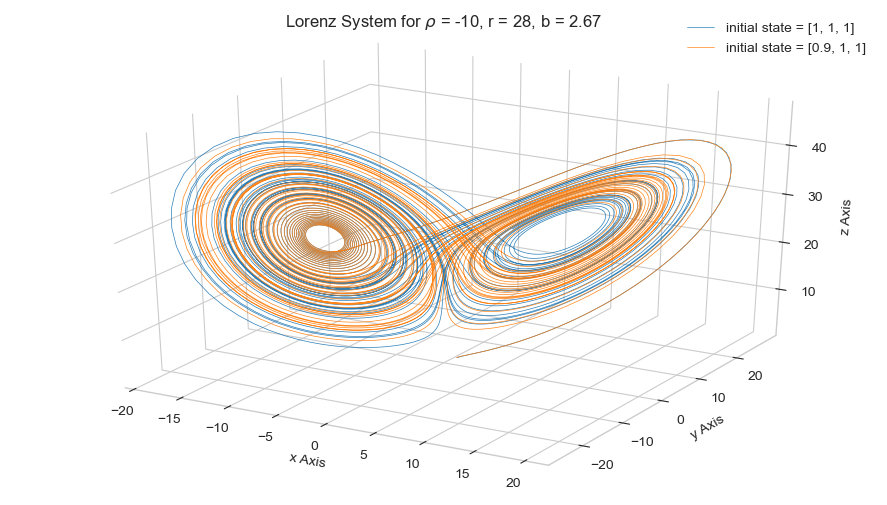

In [3]:
rho = -10
r = 28
b = 8 / 3

state1 = [1, 1, 1]
state2 = [0.9, 1, 1]
h = 0.01
N = 5000

LS = LorenzSystem(rho, r, b)
LS.plot(state1, state2, h=h, N=N)

### Beobachtungen

schaut leiwand aus

„bei gleicher Schrittweite ist Euler explizit ganz schlecht, weil…

Runge-Kutte 4 besser aber auch nicht gut, weil …

Prediktor-Korrektor sehr gut, was man daran erkennt…

Wir erklären uns das so: …“

### Quellen

[Wikipedia Lorenz-System](https://en.wikipedia.org/wiki/Lorenz_system)
[Wikipedia Predictor-corrector method](https://en.wikipedia.org/wiki/Predictor–corrector_method)